## Notebook de demonstração para o módulo aproximação

Este é um notebook para exemplificar o uso das seguintes funções presentes no módulo aproximação:

1. ajuste_linear
2. ajuste_polinomial
3. ajuste_exponencial
4. ajuste_logaritmo
5. ajuste_multiplo
6. avaliar_ajuste
7. melhor_ajuste

## Configurações

In [35]:
#Bloco de configuração para importar o módulo de um diretório pai
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

## Preparação do Ambiente

In [36]:
import numpy as np

from CB2325NumericaG07.aproximacao import ajuste
from CB2325NumericaG07.aproximacao import ajuste_linear
from CB2325NumericaG07.aproximacao import ajuste_polinomial
from CB2325NumericaG07.aproximacao import ajuste_senoidal
from CB2325NumericaG07.aproximacao import ajuste_exponencial
from CB2325NumericaG07.aproximacao import ajuste_logaritmo
from CB2325NumericaG07.aproximacao import ajuste_multiplo
from CB2325NumericaG07.aproximacao import avaliar_ajuste
from CB2325NumericaG07.aproximacao import melhor_ajuste



## Ajuste Linear

### Exemplo 01 - Ajuste linear com Ruído

Como exemplo, temos a reta $y = 2x + 3$ com um grau de ruído associado.
<br>
Observa-se que os coeficientes encontrados (a, b) devem ficar próximos aos originais (2, 3), com a diferença sendo explicada pelo ruído gerado.

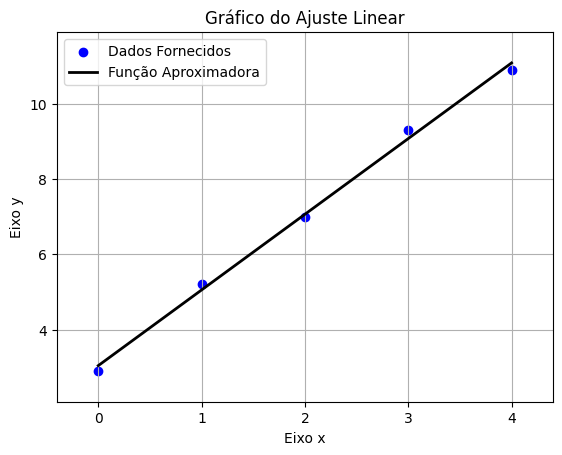

array([2.01, 3.04])

In [3]:
valores_x = [0, 1, 2, 3, 4]
valores_y = [2.9, 5.2, 7.0, 9.3, 10.9]

ajuste_linear(valores_x, valores_y, plt_grafico=True)

### Exemplo 02 - Ajuste linear sem Ruído

Como exemplo, temos a reta $y = -3x + 10$ sem ruído algum.
<br>
Observa-se que os coeficientes encontrados (a, b) devem ser exatamente igual aos originais (-3, 10).

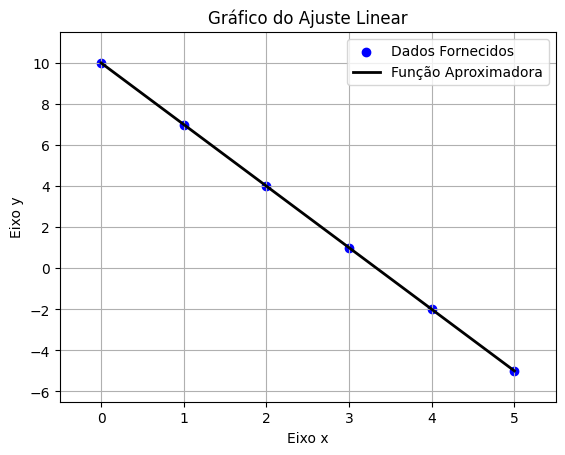

array([-3., 10.])

In [4]:
valores_x = [0, 1, 2, 3, 4, 5] 
valores_y = [10.0, 7.0, 4.0, 1.0, -2.0, -5.0]

ajuste_linear(valores_x, valores_y, plt_grafico=True)

### Exemplo 03 - Forma genérica

É possível também acessar fazer o ajuste por meio da função genérica `ajuste`.

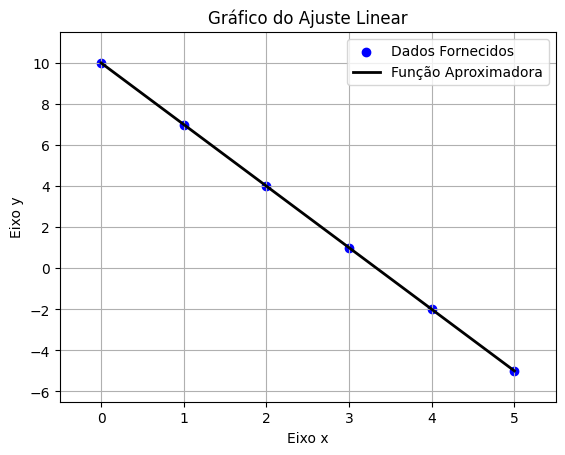

[-3. 10.]


In [5]:
print(ajuste(valores_x, valores_y, 'lin', plt_grafico=True))

## Ajuste Polinomial

### Exemplo 01 - Polinômio do 2o Grau

Como exemplo, temos $y = x^2 - 5x - 6$ com grau de ruído associado.
<br>
Observa-se que os coeficientes ficaram próximos aos originais, com a distância sendo explicada em grande parte pelo ruído gerado.

Função Polinomial Aproximadora: 0.999273306693092*x**2 - 4.92775121369194*x - 5.92366396802035


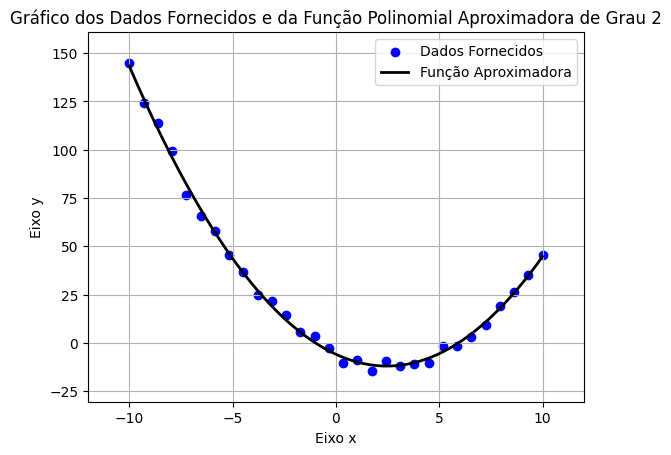

In [37]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(42)
x = np.linspace(-10, 10, 30)
y = x ** 2 - 5 * x - 6 + rng.normal(0, 3, size=x.shape)

# Passo 02: Aproximação

coeficientes = ajuste_polinomial(x, y, 2, expr=True, plt_grafico=True)

### Exemplo 02 - Polinômio do 3o Grau

Como exemplo, temos $y = x^3 - x^2 + x + 10$ com dois diferentes graus de ruído associado.
<br>
Nesse caso, observa-se que, quando o ruído aumenta, a diferença para os coeficientes originais tende a aumentar.

Função Polinomial Aproximadora: 1.00234894759625*x**3 - 1.00035993390635*x**2 + 0.948731294508916*x + 9.36472212373634


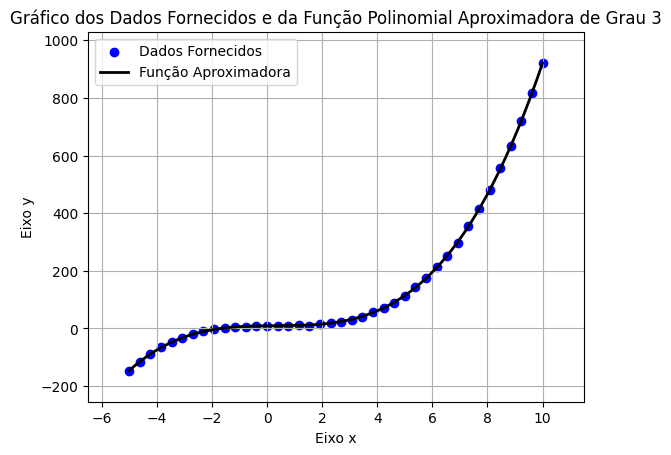

In [38]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(10)
x = np.linspace(-5, 10, 40)
y = x ** 3 - x ** 2 + x + 10 + rng.normal(0, 2, size=x.shape)

# Passo 02: Aproximação

coeficientes = ajuste_polinomial(x, y, 3, expr=True, plt_grafico=True)

In [39]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(10)
x = np.linspace(-5, 10, 40)
y = x ** 3 - x ** 2 + x + 10 + rng.normal(0, 10, size=x.shape)

# Passo 02: Aproximação

coeficientes = ajuste_polinomial(x, y, 3, expr=True)

Função Polinomial Aproximadora: 1.01174473798129*x**3 - 1.00179966953213*x**2 + 0.743656472544608*x + 6.82361061868127


In [40]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(10)
x = np.linspace(-5, 10, 40)
y = x ** 3 - x ** 2 + x + 10 + rng.normal(0, 20, size=x.shape)

# Passo 02: Aproximação

coeficientes = ajuste_polinomial(x, y, 3, expr=True)

Função Polinomial Aproximadora: 1.02348947596259*x**3 - 1.00359933906435*x**2 + 0.487312945089208*x + 3.6472212373624


### Exemplo 03 - Polinomio do 2o Grau ajustado ao 5o Grau

Também podemos buscar aproximações de graus diferentes para polinômios de graus diferentes.
<br>
No exemplo abaixo, podemos perceber que, para $ y = x^2 - 2x + 4$ (sem ruído inserido), um ajuste ao 5o grau retorna os coeficientes associados a $x$ com grau maior que $2$ muito próximos do zero. 
<br>
Assim, obtemos praticamente o polinômio original.

Função Polinomial Aproximadora: 4.07075837619052e-18*x**5 - 4.01446302485504e-16*x**3 + 1.0*x**2 - 2.00000000000001*x + 3.9999999999998


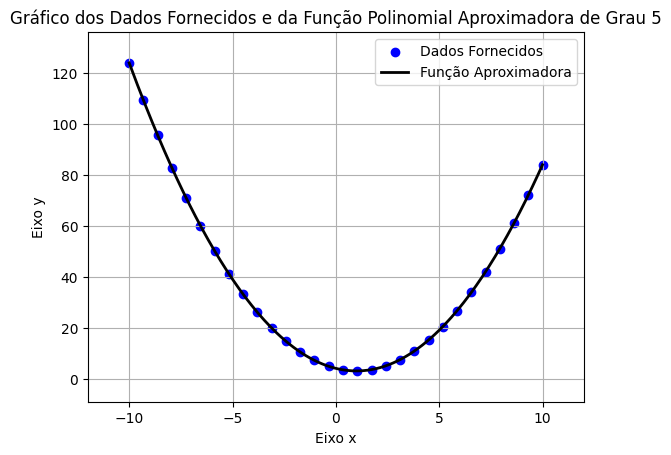

In [41]:
# Passo 01: Gerar os pontos

x = np.linspace(-10, 10, 30)
y = x ** 2 - 2 * x + 4

# Passo 02: Aproximação

coeficientes = ajuste_polinomial(x, y, 5, expr=True, plt_grafico=True)

## Ajuste Senoidal

### Exemplo 01 - Dados com Ruído

Como exemplo, temos $y = 5\sin(0.25x - \pi) + 12$ com adição de ruído.
<br>
Podemos observar que os coeficientes gerados se aproximaram bastante dos originais, com a diferença podendo ser explicada, em grande parte, pelo ruído.

Função Senoidal Aproximadora: 4.8618 * sin(0.2503x + 3.1280) + 11.8947


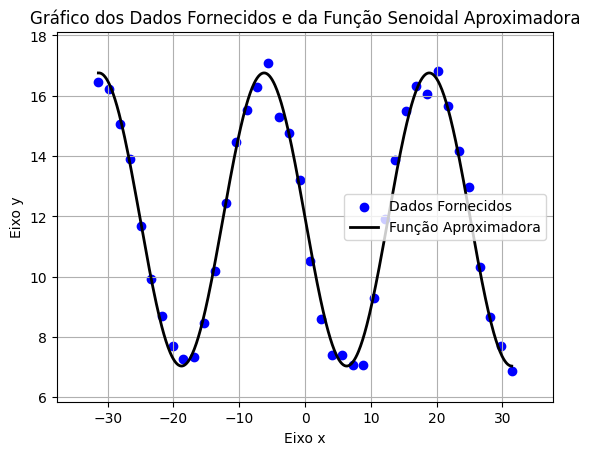

In [11]:
# Passo 01 - Gerar os Pontos

rng = np.random.default_rng(10)
x = np.linspace(-10 * np.pi, 10 * np.pi, 40)
y = 5 * np.sin(0.25 * x - np.pi) + 12 + rng.normal(0, 0.5, size=x.shape)

# Passo 02 - Aproximação

coeficientes = ajuste_senoidal(x, y, T_aprox=8 * np.pi, expr=True, plt_grafico=True)

### Exemplo 02 - Frequência Negativa

Como exemplo, temos $y = 5\sin(-\frac{\pi}{10} x - \pi) + 12$ sem adição de ruído.
<br>
Uma vez que o código busca fornecer frequências positivas para a aproximação, é possível observar a compensação no termo de fase.

Função Senoidal Aproximadora: 4.9967 * sin(0.3146x - 0.0000) + 12.0000


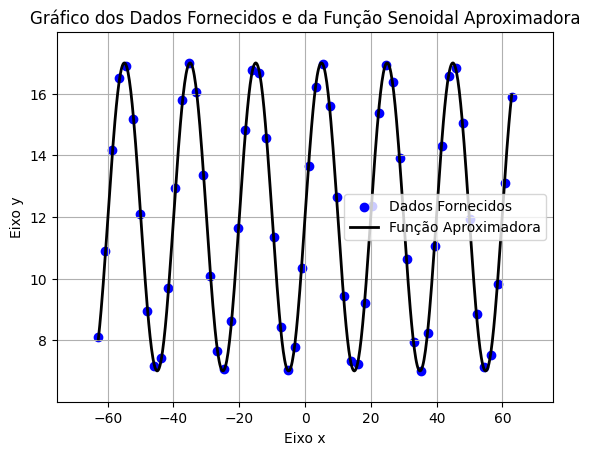

In [12]:
# Passo 01 - Gerar os Pontos

x = np.linspace(-20 * np.pi, 20 * np.pi, 60)
y = 5 * np.sin(- 0.1 * np.pi * x - np.pi) + 12

# Passo 02 - Aproximação

coeficientes = ajuste_senoidal(x, y, T_aprox=20, expr=True, plt_grafico=True)

## Ajuste Exponencial

### Exemplo 01 - Ajuste Exponencial crescente com Ruído

Como exemplo, temos a função $y = 1.0 \cdot e^{0.5x}$ com um grau de ruído associado. <br>
Observa-se que os coeficientes encontrados (a, b) para $y = b \cdot e^{ax}$ devem ficar próximos aos originais (1.0, 0.5), com a diferença sendo explicada pelo ruído gerado.

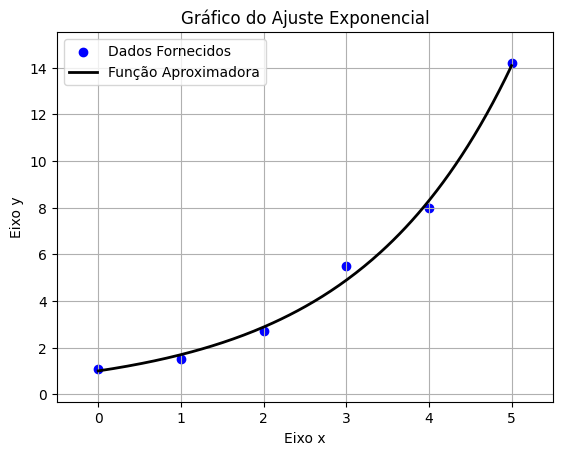

array([0.52923099, 0.99883299])

In [13]:
valores_x = [0, 1, 2, 3, 4, 5]
valores_y = [1.1, 1.5, 2.7, 5.5, 8.0, 14.2]

ajuste_exponencial(valores_x, valores_y, plt_grafico=True)

### Exemplo 02 - Ajuste Exponencial decrescente sem Ruído

Como exemplo, temos a função $y = 100 \cdot e^{-0.2x}$ sem ruído algum. <br>
Observa-se que os coeficientes encontrados (a, b) para $y = b \cdot e^{ax}$ devem ser exatamente iguais aos originais.

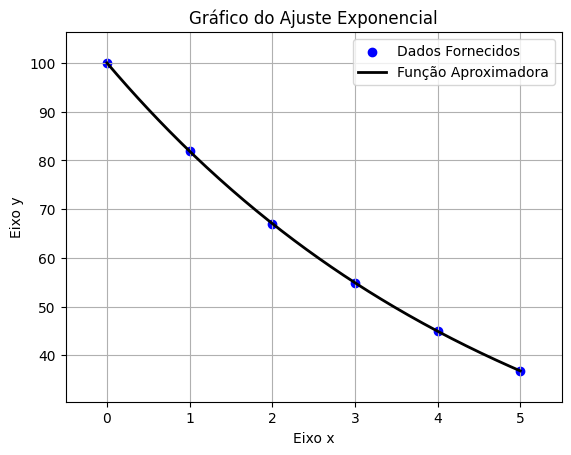

array([ -0.20003291, 100.00207572])

In [14]:
valores_x = [0, 1, 2, 3, 4, 5] 
valores_y = [100.0, 81.87, 67.03, 54.88, 44.93, 36.78]

ajuste_exponencial(valores_x, valores_y, plt_grafico=True)

## Ajuste Logaritmo

### Exemplo 01 - Ajuste Logaritmo crescente com Ruído

Como exemplo, temos a função $y = 2 \ln(x) + 0.6$ com um grau de ruído associado. <br>
Observa-se que os coeficientes encontrados (a, b) devem ficar próximos aos originais (2.0, 0.6), com a diferença sendo explicada pelo ruído gerado.

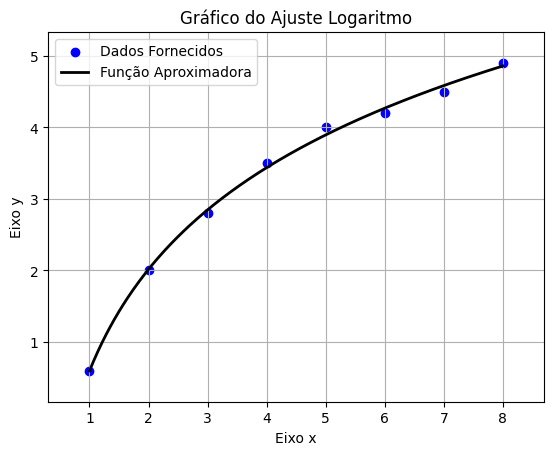

array([0.59666805, 2.04879483])

In [15]:
valores_x = [1, 2, 3, 4, 5, 6, 7, 8] 
valores_y = [0.6, 2.0, 2.8, 3.5, 4.0, 4.2, 4.5, 4.9]

ajuste_logaritmo(valores_x, valores_y, plt_grafico=True)

### Exemplo 02 - Ajuste Logaritmo decrescente sem Ruído

Como exemplo, temos a função $y = -2 \ln(x) + 10$ sem ruído algum. <br>
Observa-se que os coeficientes encontrados (a, b) devem ser exatamente iguais aos originais (-2.0, 10.0).

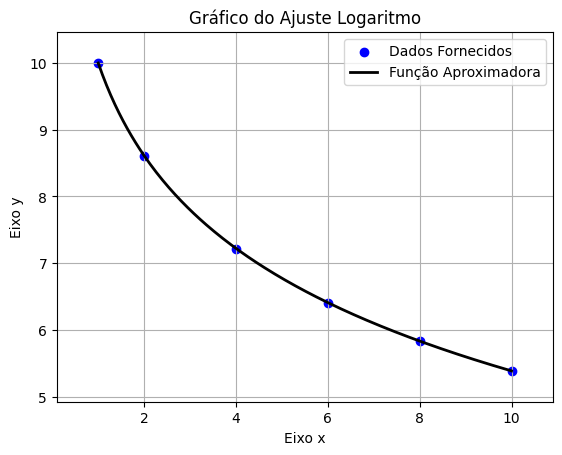

array([ 9.99885201, -2.00322986])

In [16]:
valores_x = [1, 2, 4, 6, 8, 10] 
valores_y = [10.0, 8.61, 7.22, 6.41, 5.83, 5.39]

ajuste_logaritmo(valores_x, valores_y, plt_grafico=True)

In [17]:
ajuste_logaritmo([1, 2, 5, 10, 20], [2.0, 4.1, 6.8, 8.9, 11.0])

array([2.00121844, 2.9988423 ])

## Ajuste Múltiplo

### Exemplo 01 - Sem Intercepto

Como exemplo, temos $y = 5x_{1} - 9x_{2}$ com ruído adicionado. Percebe-se uma grande proximidade aos coeficientes originais.

In [18]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(42)
x1 = np.array([-9.02, 32, 11.45, 90, -8.33])
x2 = np.array([154, 0.95, -78, -0.55, 99])
y = 5 * x1 - 9 * x2 + rng.normal(0, 5, size=x1.shape)

# Passo 02: Aproximação

coeficientes = ajuste_multiplo([x1, x2], y, incluir_intercepto=False, expr=True)

Função Aproximadora para Regressão Múltipla: 5.0312182037677*x1 - 9.02357813578169*x2


### Exemplo 02 - Com Intercepto

Como exemplo, temos $y = 5x_{1} - 9x_{2} + 200$ com ruído adicionado. Percebe-se, mais uma vez, uma grande proximidade aos coeficientes originais.

In [42]:
# Passo 01: Gerar os pontos

rng = np.random.default_rng(42)
x1 = np.array([-9.02, 32, 11.45, 90, -8.33])
x2 = np.array([154, 0.95, -78, -0.55, 99])
y = 5 * x1 - 9 * x2 + 200 + rng.normal(0, 5, size=x1.shape)

# Passo 02: Aproximação

coeficientes = ajuste_multiplo([x1, x2], y, expr=True, incluir_intercepto=True)

Função Aproximadora para Regressão Múltipla: 5.05784128593727*x1 - 9.0131655042781*x2 + 198.12348492767


## Avaliar Ajuste

A função é usada para calcular métricas de qualidade de um ajuste já realizado.

Ela pode calcular os seguintes critérios:
* R2: Coeficiente de Determinação
* R2A: R2 Ajustado
* AIC: Critério de Informação de Akaike
* AICc: Critério de Informação de Akaike Corrigido
* BIC: Critério de Informação Bayesiano

### Exemplo 01 - Avaliar Ajuste Linear com R2

Como exemplo, temos a reta $y = 2x + 3$ com um grau de ruído associado.
<br>
Calculamos o R2 da função linear ajustada sobre esses dados.

In [20]:
valores_x = [0, 1, 2, 3, 4]
valores_y = [2.9, 5.2, 7.0, 9.3, 10.9]

coeficientes = ajuste_linear(valores_x, valores_y, plt_grafico=False)

avaliar_ajuste(valores_x, valores_y, "R2", "linear", coeficientes)

np.float64(0.9967679857890062)

### Exemplo 02 - Avaliar Ajuste Polinomial com R2A

Como exemplo, temos o polinômio $y = x^2 - 5x - 6$ com um grau de ruído associado.
<br>
Calculamos o R2A da função polinomial ajustada sobre esses dados.

In [21]:
rng = np.random.default_rng(42)
x = np.linspace(-10, 10, 30)
y = x ** 2 - 5 * x - 6 + rng.normal(0, 3, size=x.shape)

coeficientes = ajuste_polinomial(x, y, 2, plt_grafico=False)

avaliar_ajuste(x, y, "R2A", "polinomial", coeficientes)

np.float64(0.9969983289465)

### Exemplo 03 - Avaliar Ajuste Exponencial com AIC

Como exemplo, temos a função $y = 1.0 \cdot e^{0.5x}$ com um grau de ruído associado.
<br>
Calculamos o AIC da função exponencial ajustada sobre esses dados.

In [22]:
valores_x = [0, 1, 2, 3, 4, 5]
valores_y = [1.1, 1.5, 2.7, 5.5, 8.0, 14.2]

coeficientes = ajuste_exponencial(valores_x, valores_y, plt_grafico=False)

avaliar_ajuste(valores_x, valores_y, "AIC", "exponencial", coeficientes)

np.float64(-10.254733462158804)

### Exemplo 04 - Avaliar Ajuste Exponencial com AICc

Como exemplo, temos a função $y = 1.0 \cdot e^{0.5x}$ com um grau de ruído associado.
<br>
Calculamos o AICc da função exponencial ajustada sobre esses dados.

In [23]:
valores_x = [0, 1, 2, 3, 4, 5]
valores_y = [1.1, 1.5, 2.7, 5.5, 8.0, 14.2]

coeficientes = ajuste_exponencial(valores_x, valores_y, plt_grafico=False)

avaliar_ajuste(valores_x, valores_y, "AICc", "exponencial", coeficientes)

np.float64(-6.2547334621588035)

### Exemplo 05 - Avaliar Ajuste Logaritmo com BIC

Como exemplo, temos a função $y = 2 \ln(x) + 0.6$ com um grau de ruído associado.
<br>
Calculamos o BIC da função exponencial ajustada sobre esses dados.

In [24]:
valores_x = [1, 2, 3, 4, 5, 6, 7, 8] 
valores_y = [0.6, 2.0, 2.8, 3.5, 4.0, 4.2, 4.5, 4.9]

coeficientes = ajuste_logaritmo(valores_x, valores_y, plt_grafico=False)

avaliar_ajuste(valores_x, valores_y, "BIC", "logaritmo", coeficientes)

np.float64(-40.23285635643475)

### Exemplo 06 - Avaliar Ajuste Linear com todos os critérios

Como exemplo, temos a reta $y = 2x + 3$ com um grau de ruído associado.
<br>
Calculamos o todos os critérios (R2, R2A, AIC, AICc, BIC) sobre função linear ajustada sobre esses dados.

In [25]:
valores_x = [0, 1, 2, 3, 4]
valores_y = [2.9, 5.2, 7.0, 9.3, 10.9]

coeficientes = ajuste_linear(valores_x, valores_y, plt_grafico=False)

avaliar_ajuste(valores_x, valores_y, "all", "linear", coeficientes)

(np.float64(0.9967679857890062),
 np.float64(0.9935359715780123),
 np.float64(-14.209979341075421),
 np.float64(-8.209979341075421),
 np.float64(-14.99110351620722))

## Melhor Ajuste

### Exemplo 01 - Função Linear sem Ruído

Nesse exemplo, temos $y = 5x - 4$ sem ruído e verificamos que, de fato, o modelo sugerido para o critério R^2 Ajustado é o linear.

Modelo sugerido: Aproximação linear
R2A: 1.000000

R2: 1.0
AIC: -926.9665549277212
AICc: -926.5221104832767
BIC: -924.1641601643969
Função linear aproximadora: y = 5.0000x + -4.0000


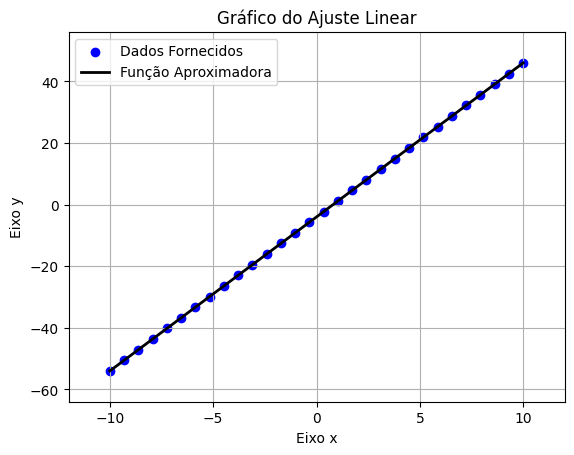

In [43]:
# Passo 01: Gerar os pontos

x = np.linspace(-10, 10, 30)
y = 5 * x - 4

# Passo 02: Obter o modelo sugerido

mod, infos = melhor_ajuste(x, y, "R2A", exibir_todos=True, expr=True, plt_grafico=True)

### Exemplo 02 - Função do 5o Grau sem Ruído

Nesse exemplo, temos $y = 7.5x^5 - 6x^4 + 3x^3 + x^2 - 10x - 9.5$ sem ruído e verificamos, de fato, o modelo sugerido para o critério BIC é o polinomial de 5o grau.

Modelo sugerido: Aproximação polinomial grau 5
BIC: -910.559371

R2: 1.0
R2 Ajustado: 1.0
AIC: -918.9665549277212
AICc: -915.3143810146777
Função Polinomial Aproximadora: 7.5*x**5 - 6.00000000000007*x**4 + 3.00000000000009*x**3 + 1.0000000000037*x**2 - 10.0000000000427*x - 9.49999999999362


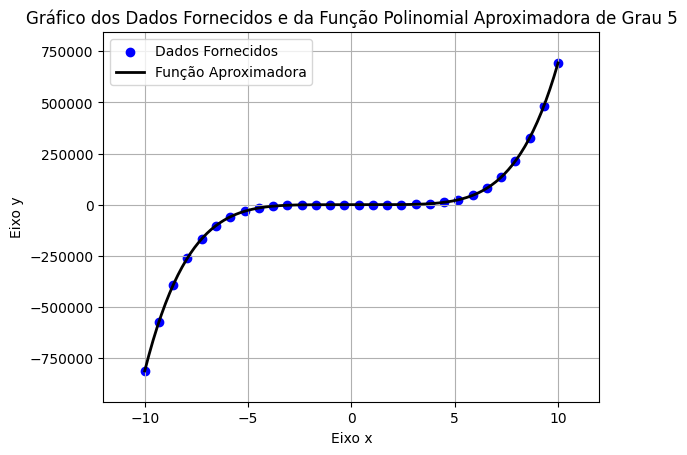

In [44]:
# Passo 01: Gerar os pontos

x = np.linspace(-10, 10, 30)
y = 7.5 * x ** 5 - 6 * x ** 4 + 3 * x ** 3 + x ** 2 - 10 * x - 9.5

# Passo 02: Obter o modelo sugerido

mod, infos = melhor_ajuste(x, y, "BIC", exibir_todos=True, expr=True, plt_grafico=True)

### Exemplo 03 - Função do 2o Grau com Ruído

Como exemplo, temos $y = 0.5x^2 + 2x - 9.5$ com adição de ruído.
<br>
Podemos observar que, para os parâmetros R^2 Ajustado, AICc e BIC, o modelo selecionado foi a Função Polinomial do 3o Grau, apesar de o termo cúbico ser pequeno. Isso mostra que, mesmo o modelo original sendo de determinado grau, determinados critérios podem preferir modelos diferentes.

In [45]:
# Passo 01: Gerar os Pontos

rng = np.random.default_rng(10)
x = np.linspace(-5, 15, 20)
y = 0.5 * x ** 2 + 2 * x - 9.5 + rng.normal(0, 2, size=x.shape)

R2 Ajustado - Ajuste do 2o Grau vs. Modelo Sugerido (Ajuste do 3o Grau)

Modelo Sugerido (Ajuste do 3o Grau)

Modelo sugerido: Aproximação polinomial grau 3
R2A: 0.999326

Função Polinomial Aproximadora: 0.00502478631126424*x**3 + 0.414937034838197*x**2 + 2.12272875396464*x - 8.8690094269299


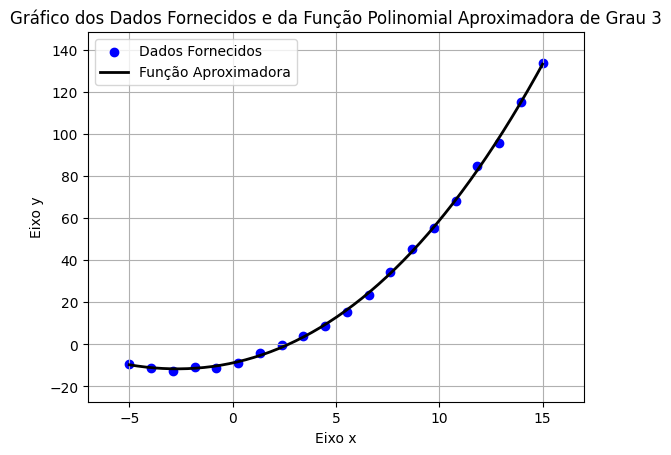

In [46]:
# Passo 02: R2 Ajustado - Modelo Sugerido

mod, infos = melhor_ajuste(x, y, "R2A", expr=True, plt_grafico=True)

Ajuste do 2o Grau

Função Polinomial Aproximadora: 0.490308829507153*x**2 + 2.07797892573557*x - 9.90145686359996
R2A: 0.998930


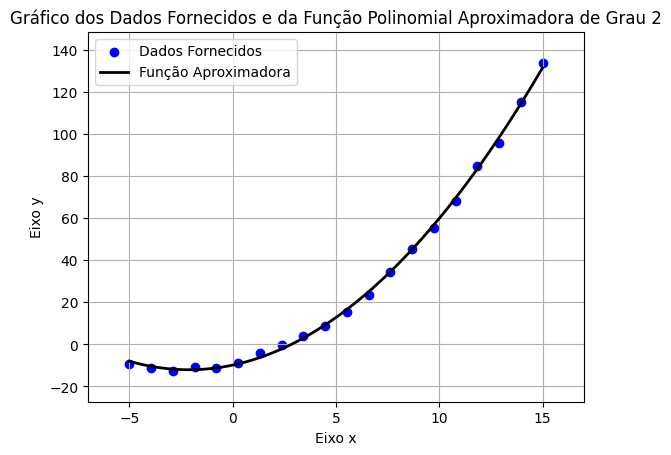

In [ ]:
# Passo 02: R2 Ajustado - Ajuste do 2o Grau

mod_quad = avaliar_ajuste(x, y, "R2A", "polinomial", ajuste_polinomial(x, y, 2, plt_grafico=False, expr=True))
print(f"R2A: {mod_quad:.6f}")
mod_aj = ajuste_polinomial(x, y, 2, plt_grafico=True) # Apenas para visualizar o gráfico após o critério

AICc - Modelo Sugerido (Ajuste do 3o Grau) vs. Ajuste do 2o Grau

Modelo Sugerido (Ajuste do 3o Grau)

In [54]:
# Passo 03: AICc - Modelo Sugerido

mod, infos = melhor_ajuste(x, y, "AICc", expr=True, plt_grafico=False)

Modelo sugerido: Aproximação polinomial grau 3
AICc: 12.477360

Função Polinomial Aproximadora: 0.00502478631126424*x**3 + 0.414937034838197*x**2 + 2.12272875396464*x - 8.8690094269299


Ajuste do 2o Grau

In [55]:
# Passo 03: AICc - Ajuste do 2o Grau

mod_quad = avaliar_ajuste(x, y, "AICc", "polinomial", ajuste_polinomial(x, y, 2, plt_grafico=False, expr=True))
print(f"AICc: {mod_quad:.6f}")

Função Polinomial Aproximadora: 0.490308829507153*x**2 + 2.07797892573557*x - 9.90145686359996
AICc: 19.831849


BIC - Modelo Sugerido (Ajuste do 3o Grau) vs. Ajuste do 2o Grau

Modelo Sugerido (Ajuste do 3o Grau)

In [56]:
# Passo 04: BIC - Modelo Sugerido

mod, infos = melhor_ajuste(x, y, "BIC", plt_grafico=False, expr=True)

Modelo sugerido: Aproximação polinomial grau 3
BIC: 13.793622

Função Polinomial Aproximadora: 0.00502478631126424*x**3 + 0.414937034838197*x**2 + 2.12272875396464*x - 8.8690094269299


Ajuste do 2o Grau

In [57]:
# Passo 04: BIC - Ajuste do 2o Grau

mod_quad = avaliar_ajuste(x, y, "BIC", "polinomial", ajuste_polinomial(x, y, 2, plt_grafico=False, expr=True))
print(f"BIC: {mod_quad:.6f}")

Função Polinomial Aproximadora: 0.490308829507153*x**2 + 2.07797892573557*x - 9.90145686359996
BIC: 21.319046
